# Clasificación

### Introduction

In this notebook, we explore the application of various machine learning models for the classification of chess piece images. The dataset consists of images representing different chess pieces, and the objective is to accurately classify each image into one of the six chess piece categories: King, Queen, Bishop, Knight, Rook, and Pawn.

The notebook is structured to evaluate different approaches for feature extraction and classification:

1. **Feature Extraction**: We begin by extracting features from the images using three different methods:
   - **Raw Pixel Values**: Flattened image vectors.
   - **Histogram of Oriented Gradients (HOG)**: A technique that captures the structure and texture of the images.
   - **Concatenated Color Histograms**: A method that captures color distribution by concatenating histograms from each color channel.

2. **Classification Models**: The extracted features are then used to train and evaluate four machine learning models:
   - **Random Forest (RF)**: An ensemble learning method that constructs multiple decision trees and outputs the mode of their predictions.
   - **Support Vector Machines (SVM)**: A powerful classifier that works well with high-dimensional data and is effective for classification tasks.
   - **Convolutional Neural Networks (CNN)**: A deep learning model designed to process image data by learning hierarchical representations.
   - **K-Nearest Neighbors (KNN)**: A simple, instance-based learning algorithm that classifies data based on the majority vote of its neighbors.

The notebook aims to compare the effectiveness of these models across different feature representations, assessing their accuracy, precision, recall, and overall performance. Through this analysis, we aim to identify the best combination of feature extraction technique and classification model for this particular image classification task.

In [1]:
# Importaciones de primer party
import os
import zipfile
import glob

# Importaciones de third party
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm
from skimage.feature import hog
from skimage import color
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


# Visualization settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("All necessary packages for this lab have been imported.")

2024-08-22 23:26:35.422139: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-22 23:26:35.423226: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 23:26:35.427192: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-22 23:26:35.436750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 23:26:35.451121: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Se importaron todos los paquetes necesarios para este laboratorio.


## 2. Load Dataset
The dataset used in this lab is from [Kaggle](https://www.kaggle.com/datasets/niteshfre/chessman-image-dataset) and contains images of the six chess pieces. Explore the dataset to observe the variability in colors, lighting, and other elements. You’ll notice that even within the same class, images can have different appearances and backgrounds, increasing the complexity for our models.

In [2]:
# Define the base directory for the dataset
base_dir = '/home/alyonaivanova/personal/Computer-Vision/data/Chessman-image-dataset/Chess'

# Check if the directory exists
if not os.path.exists(base_dir):
    print(f"The directory {base_dir} does not exist.")
else:
    print(f"Loading dataset from {base_dir}...")

    # Initialize lists for images and labels
    images, labels = [], []

    # Get the list of classes (subdirectories)
    classes = os.listdir(base_dir)
    sample_images = {}

    # Load images and labels
    for label in classes:
        class_dir = os.path.join(base_dir, label)
        for img_path in tqdm(glob.glob(os.path.join(class_dir, '*'))):
            try:
                # Open, resize, and convert image to an array
                img = Image.open(img_path).convert('RGB').resize((128, 128))
                images.append(np.array(img))
                labels.append(label)

                # Store a sample image for each class
                if label not in sample_images:
                    sample_images[label] = img
                    
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")

    # Convert lists to numpy arrays
    images = np.array(images)
    labels = np.array(labels)

    # Create an array of indices for further data splitting
    indices = np.arange(len(images))

    print(f"Successfully loaded {images.shape[0]} images.")

Loading dataset from /home/alyonaivanova/personal/Computer-Vision/data/Chessman-image-dataset/Chess...


100%|██████████| 87/87 [00:00<00:00, 109.15it/s]

Successfully loaded 556 images.


# Train and Test Date

In [3]:
# Split into training, validation, and test sets
X_train_indices, X_test_indices = train_test_split(indices, test_size=0.2, stratify=labels, random_state=42)
X_train = images[X_train_indices]
y_train = labels[X_train_indices]

X_test = images[X_test_indices]
y_test = labels[X_test_indices]

print(f'Training set size: {len(X_train)}')
print(f'Test set size: {len(X_test)}')

# Check image dimensions
print(f'Image dimensions: {X_train[0].shape}')


Training set size: 444
Test set size: 112
Image dimensions: (128, 128, 3)


## 3. Visualizar datos

Dataset Visualization:


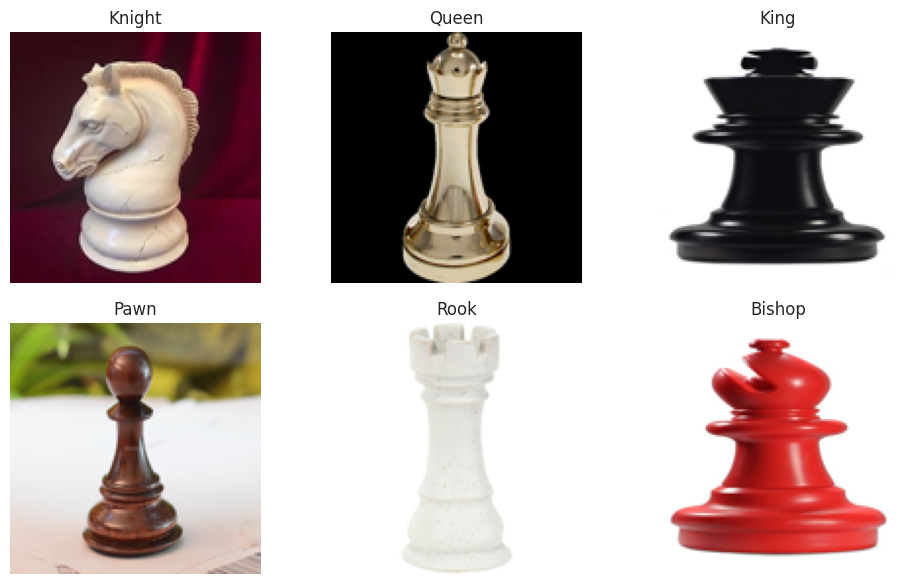

In [4]:
print("Dataset Visualization:")
fig, axes = plt.subplots(2, 3)
for ax, cls in zip(axes.flatten(), classes):
    random_img = sample_images[cls]
    ax.imshow(random_img)
    ax.set_title(cls)
    ax.axis('off')

plt.tight_layout()
plt.show()

# flatten IMG

In [5]:
# Flatten the images
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# K-Nearest Neighbors (KNN)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_flat, y_train)
y_pred_knn = knn_model.predict(X_test_flat)

KNN Classification Report:
              precision    recall  f1-score   support

      Bishop       0.19      0.59      0.29        17
        King       0.00      0.00      0.00        15
      Knight       0.43      0.29      0.34        21
        Pawn       0.29      0.09      0.14        22
       Queen       0.20      0.12      0.15        16
        Rook       0.19      0.14      0.16        21

    accuracy                           0.21       112
   macro avg       0.22      0.21      0.18       112
weighted avg       0.23      0.21      0.19       112

KNN Accuracy: 0.21


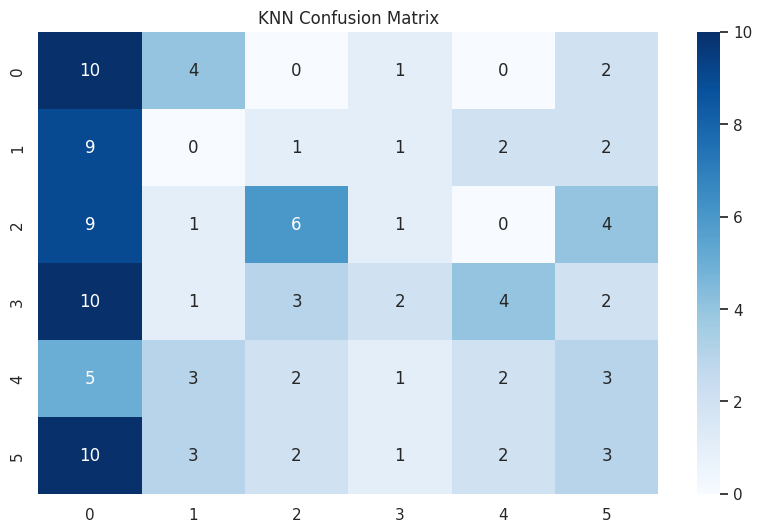

In [7]:
# Evaluate KNN
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.2f}")

# Plot confusion matrix for KNN
conf_mat_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_mat_knn, annot=True, cmap='Blues', fmt='d')
plt.title('KNN Confusion Matrix')
plt.show()

### KNN Model Conclusions

1. **Low Overall Accuracy**:
   - The KNN model achieved an overall accuracy of only 21%, indicating that it struggled to correctly classify the majority of the images in the test set.

2. **Poor Precision and Recall**:
   - The precision and recall scores across most classes were low, with F1-scores generally below 0.35. This suggests that the model has difficulty in both correctly identifying instances of each class and avoiding false positives.

3. **High Confusion Between Classes**:
   - The confusion matrix reveals significant confusion between different classes. For example, many images belonging to one class were often misclassified as another, leading to a high number of incorrect predictions.

4. **Inadequate Feature Representation**:
   - The poor performance of KNN suggests that the current feature representation (flattened image vectors) may not be sufficient to capture the complex patterns needed for effective classification.

5. **Limitations of KNN for High-Dimensional Data**:
   - KNN may not be the best model for this type of high-dimensional image data, as it relies heavily on the proximity of points in the feature space, which can be less effective when the data has many dimensions.

# Deep Learning (CNN):

In [10]:
# Convert labels to integers
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Ensure X_train and X_test are in the correct shape
# They should have the shape (samples, 128, 128, 3)
print(f"X_train shape: {X_train.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")

# Build CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(set(y_train_encoded)), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"CNN Accuracy: {accuracy:.2f}")



X_train shape: (444, 128, 128, 3)
y_train_encoded shape: (444,)


/home/alyonaivanova/miniconda3/envs/MasterAI/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 316ms/step - accuracy: 0.1608 - loss: 6595.8496 - val_accuracy: 0.1429 - val_loss: 870.7064
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.1500 - loss: 554.0949 - val_accuracy: 0.1429 - val_loss: 38.7300
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 260ms/step - accuracy: 0.2612 - loss: 23.1142 - val_accuracy: 0.1786 - val_loss: 14.0587
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 269ms/step - accuracy: 0.3081 - loss: 8.0930 - val_accuracy: 0.2054 - val_loss: 3.4037
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 257ms/step - accuracy: 0.3523 - loss: 1.9567 - val_accuracy: 0.1875 - val_loss: 2.3057
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 259ms/step - accuracy: 0.3500 - loss: 1.4721 - val_accuracy: 0.2143 - val_loss: 2.2793
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 281ms/step - accuracy: 0.3501 - loss: 1.4330 - val_accuracy: 0.2143 - val_loss: 2.2969
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 350ms/step - accuracy: 0.3546 - loss: 1.4080 - val_ac

In [11]:
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train_encoded shape: {y_train_encoded.shape}, dtype: {y_train_encoded.dtype}")
print(f"y_test_encoded shape: {y_test_encoded.shape}, dtype: {y_test_encoded.dtype}")

X_train shape: (444, 128, 128, 3), dtype: uint8
X_test shape: (112, 128, 128, 3), dtype: uint8
y_train_encoded shape: (444,), dtype: int64
y_test_encoded shape: (112,), dtype: int64


In [12]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

## Train de Model CNN

In [13]:
history = model.fit(X_train, y_train_encoded, validation_data=(X_test, y_test_encoded), epochs=10)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - accuracy: 0.2857 - loss: 1.7658 - val_accuracy: 0.1696 - val_loss: 1.7906
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 380ms/step - accuracy: 0.2505 - loss: 1.7618 - val_accuracy: 0.1696 - val_loss: 1.8032
Epoch 3/10
13/14 ━━━━━━━━━━━━━━━━━━━━ 0s 263ms/step - accuracy: 0.2649 - loss: 1.7503

# envalute the Model

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"CNN Accuracy: {accuracy:.2f}")


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2670 - loss: 2.3526
CNN Accuracy: 0.28


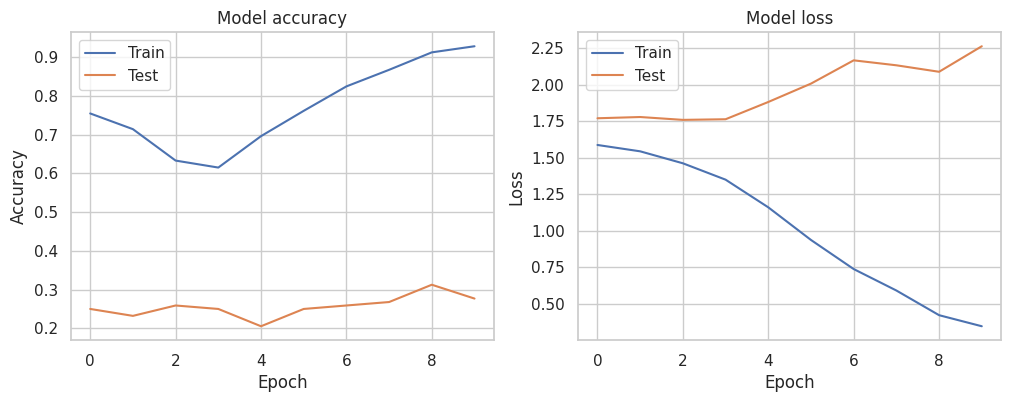

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()



### Observations

1. **Training vs. Validation Accuracy**:
   - The training accuracy increases steadily over the epochs, reaching around 90%. However, the validation accuracy remains low, around 28%.
   - This significant gap between training and validation accuracy indicates that the model is likely overfitting to the training data.

2. **Training vs. Validation Loss**:
   - The training loss decreases as expected, showing that the model is learning from the training data.
   - However, the validation loss either plateaus or even increases slightly after the initial epochs, which is another strong indication of overfitting. This means the model performs well on the training data but fails to generalize to new, unseen data.

3. **Model Performance**:
   - The CNN achieved a validation accuracy of 28%, which is low and only slightly better than the baseline accuracy (which would be around 16.67% for random guessing in a 6-class problem).
   - The loss value for the validation set is still relatively high, indicating that the model struggles to make accurate predictions on the test data.


### Training the Random Forest Model

Next, we will train a Random Forest model using the training data. For a deeper understanding of how it works and the parameters you can experiment with, we recommend checking the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier).

In [5]:
# Parámeters Random Forest
n_estimators = 10000 
min_samples_split = 2
bootstrap = True

In [6]:
# Adjust inputs for Random Forest
print(f"Initial shape of the training array: {X_train.shape}")
# Flatten the images to input vectors into the classification models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)
print(f"Shape of the training array after flattening the images: {X_train_flat.shape}")

Initial shape of the training array: (444, 128, 128, 3)
Shape of the training array after flattening the images: (444, 49152)


In [7]:
# Initialize and train the Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=n_estimators, 
    min_samples_split=min_samples_split, 
    bootstrap=bootstrap,
    random_state=42
)

rf_clf.fit(X_train_flat, y_train)

# Evaluate the model
y_pred_rf = rf_clf.predict(X_test_flat)
print("Random Forest - Evaluation Set")
print(classification_report(y_test, y_pred_rf, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

Random Forest - Evaluation Set
              precision    recall  f1-score   support

      Knight       0.19      0.18      0.18        17
       Queen       0.00      0.00      0.00        15
        King       0.46      0.62      0.53        21
        Pawn       0.21      0.18      0.20        22
        Rook       0.29      0.31      0.30        16
      Bishop       0.41      0.43      0.42        21

    accuracy                           0.30       112
   macro avg       0.26      0.29      0.27       112
weighted avg       0.28      0.30      0.29       112

Accuracy: 0.30357142857142855


### Visualization random of Random Forest 

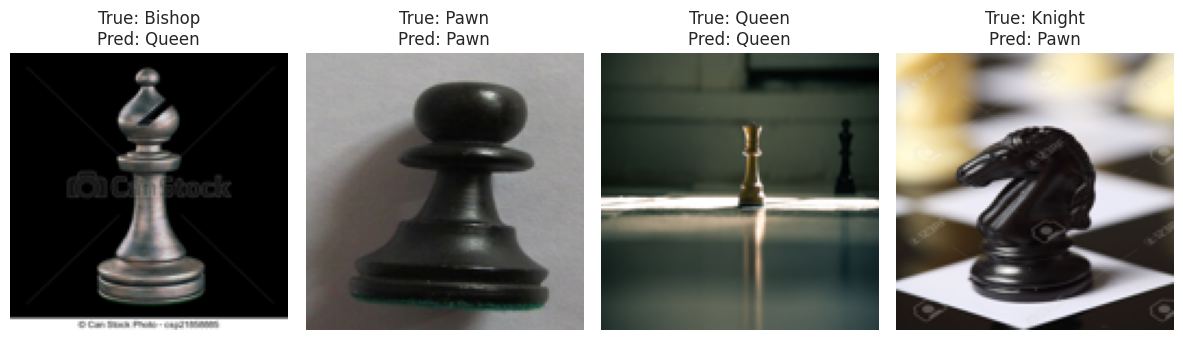

In [8]:
# Select random indices from the test set
indices = np.random.choice(len(X_test), 4, replace=False)

# Create a 1x4 subplot to display the images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for i, ax in enumerate(axes):
    idx = indices[i]
    img = X_test[idx].reshape(128, 128, 3)
    true_label = y_test[idx]
    pred_label = y_pred_rf[idx]
    
    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### 5. Training the SVM Classification Model

Next, we will train a Support Vector Machine (SVM) model using the training data. For more details on how it works and parameter options, check the [sklearn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC).

In [9]:
# SVM Model Parameters
kernel_type = 'linear'  # {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}
regularization_C = 1.0


In [10]:
# Train the SVM model
svm_clf = SVC(kernel=kernel_type, random_state=42, C=regularization_C)
svm_clf.fit(X_train_flat, y_train)
# Predict using the SVM model
y_pred_svm = svm_clf.predict(X_test_flat)

# Evaluate the model
print("SVM - Test")
print(classification_report(y_test, y_pred_svm, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

SVM - Test
              precision    recall  f1-score   support

      Knight       0.19      0.35      0.25        17
       Queen       0.08      0.07      0.07        15
        King       0.50      0.24      0.32        21
        Pawn       0.44      0.36      0.40        22
        Rook       0.18      0.19      0.18        16
      Bishop       0.38      0.43      0.40        21

    accuracy                           0.29       112
   macro avg       0.30      0.27      0.27       112
weighted avg       0.32      0.29      0.29       112

Accuracy: 0.2857142857142857


### Visualiization random results for SVM

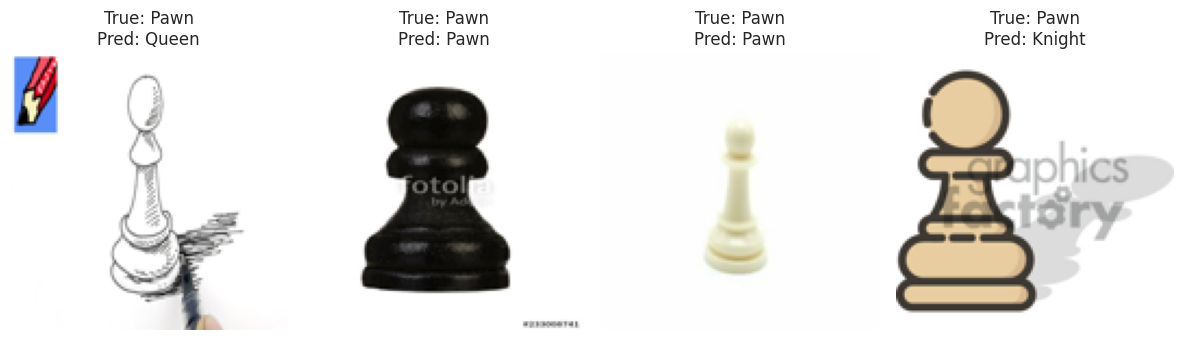

In [11]:

# Randomly select 4 images from the test set
indices = np.random.choice(len(X_test), 4, replace=False)

# Create a 1x4 subplot to display the images
fig, axes = plt.subplots(1, 4, figsize=(12, 4))

for i, ax in enumerate(axes):
    idx = indices[i]
    img = X_test[idx].reshape(128, 128, 3)
    true_label = y_test[idx]
    pred_label = y_pred_svm[idx]
    
    ax.imshow(img)
    ax.set_title(f"True: {true_label}\nPred: {pred_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()  # Visualize SVM results

# HOG Example


Visualizing Features:


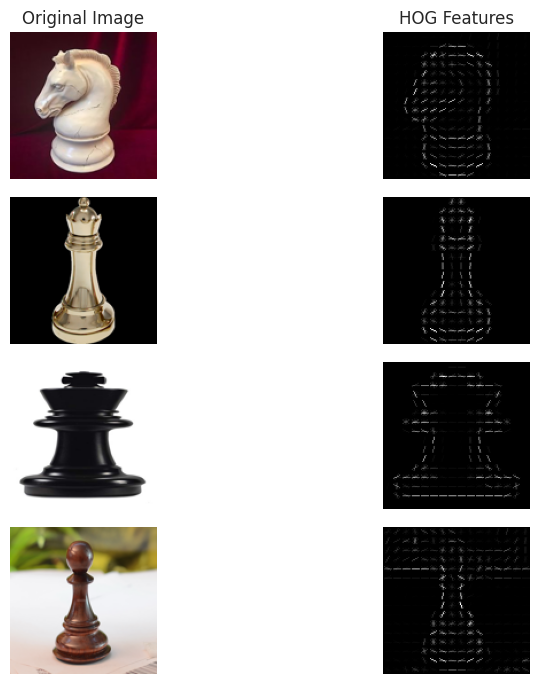

In [12]:
print("Visualizing Features:")

# Display some images from the dataset
fig, ax = plt.subplots(4, 2, figsize=(10, 7))
for i in range(len(classes[2:])):
    img = sample_images[classes[i]]
    gray_img = color.rgb2gray(img)

    # HOG
    # Review the function documentation to understand the usefulness of each parameter and how to obtain vectors instead of the HOG visualization
    ft_vec, hog_feature = hog(gray_img, pixels_per_cell=(8, 8),
                              cells_per_block=(2, 2), feature_vector=True, visualize=True)

    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')

    ax[i, 1].imshow(hog_feature, cmap='gray')
    ax[i, 1].axis('off')

    # Add titles to the columns
    if i == 0:
        ax[i, 0].set_title("Original Image")
        ax[i, 1].set_title("HOG Features")

plt.tight_layout()
plt.show()



## Feature Extraction: Color Histograms and HOG
Use the `hog()` function from `skimage.feature` and the `color()` function from `skimage` to extract feature vectors from the images. Remember that to obtain HOG histograms, the images must be in **grayscale**.

For the color representation, it is recommended to **extract the histogram of each color channel and concatenate the histograms of the three channels from the original images**. This way, the feature extraction will result in one-dimensional arrays that can be processed by the RF and SVM models.


In [13]:
# Initialize lists to store HOG and color feature vectors
hog_features = []
color_features = []

# Iterate over each image in the dataset to extract its respective HOG and color histogram feature vectors
for img in images:
    # Convert the image to grayscale for HOG feature extraction
    gray_img = color.rgb2gray(img)
    
    # Extract HOG features and store them in the "hog_features" list
    ### BEGIN SOLUTION
    hog_feature = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True, visualize=False)
    ### END SOLUTION
    hog_features.append(hog_feature)
    
    # Extract a color histogram for each channel, concatenate them into a single vector per image,
    # and store it in the "color_features" list.
    hist_feature = []
    for channel in range(3):
        hist, _ = np.histogram(img[:, :, channel], bins=256, range=(0, 256))
        hist_feature.extend(hist)
    
    # Ensure each element added to the lists is a one-dimensional array
    hog_features.append(hog_feature) 
    color_features.append(hist_feature)

# Convert lists to numpy arrays
hog_features = np.array(hog_features)
color_features = np.array(color_features)

print("Feature extraction completed. The feature vectors are stored in 'hog_features' and 'color_features', respectively.")


Feature extraction completed. The feature vectors are stored in 'hog_features' and 'color_features', respectively.


## Training and Evaluation of RF with HOG and Concatenated Color Histograms

Before we explore the use of classifiers with our new descriptors, we will split our feature vectors into training and test sets, following the same data split as used in the previous models.

**Attention!** Remember to use the parameter `random_state=42` when declaring each model required in the following phases of the lab.


In [15]:
X_train_hog_fts = hog_features[X_train_indices]
X_test_hog_fts = hog_features[X_test_indices]

X_train_color_fts = color_features[X_train_indices]
X_test_color_fts = color_features[X_test_indices]


### HOG Vectors

Complete the missing code in the following cell to build the model in the `rf_clf_HOG` variable and train it with the **HOG features of the images**. Also, obtain the predictions on the test set in the `y_pred_rf_HOG` variable.

In [16]:
# Initialize and train Random Forest with HOG features
# TODO: Declare the Random Forest model in the variable "rf_clf_HOG" and train it with the feature vectors from the training set. 
# Remember to use the code from the start of the lab as an example for declaring and training an RF model.
### BEGIN SOLUTION
rf_clf_HOG = RandomForestClassifier(n_estimators=100, min_samples_split=2, bootstrap=True, random_state=42)  # Initialize the Random Forest classifier
### END SOLUTION

rf_clf_HOG.fit(X_train_hog_fts, y_train)  # Train the model with the HOG features

# Evaluate the model
# TODO: Obtain predictions from the trained model "rf_clf_HOG" for the test set and store them in the variable "y_pred_rf_HOG".
### BEGIN SOLUTION
y_pred_rf_HOG = rf_clf_HOG.predict(X_test_hog_fts)  # Make predictions on the test set using the trained model
### END SOLUTION

# Evaluate and print the results
print("Random Forest with HOG Features - Test Set Evaluation")
print(classification_report(y_test, y_pred_rf_HOG, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_HOG))


Random Forest with HOG Features - Test Set Evaluation
              precision    recall  f1-score   support

      Knight       0.65      0.65      0.65        17
       Queen       1.00      0.87      0.93        15
        King       0.76      0.90      0.83        21
        Pawn       0.64      0.82      0.72        22
        Rook       1.00      0.50      0.67        16
      Bishop       0.90      0.90      0.90        21

    accuracy                           0.79       112
   macro avg       0.83      0.77      0.78       112
weighted avg       0.81      0.79      0.78       112

Accuracy: 0.7857142857142857


#### Vectores de histogramas concatenados

In [19]:
# Initialize and train Random Forest with concatenated color histograms
# TODO: Declare the Random Forest model in the variable "rf_clf_color_hist" and train it with the concatenated color histogram vectors from the training set.
### BEGIN SOLUTION
rf_clf_color_hist = RandomForestClassifier(n_estimators=100, min_samples_split=2, bootstrap=True, random_state=42)  # Initialize the Random Forest classifier
### END SOLUTION

rf_clf_color_hist.fit(X_train_color_fts, y_train)  # Train the model with the concatenated color histograms

# Evaluate the model
# TODO: Obtain predictions from the trained model "rf_clf_color_hist" for the test set and store them in the variable "y_pred_rf_color_hist".
### BEGIN SOLUTION
y_pred_rf_color_hist = rf_clf_color_hist.predict(X_test_color_fts)  # Make predictions on the test set using the trained model
### END SOLUTION

# Evaluate and print the results
print("Random Forest with Concatenated Color Histograms - Test Set Evaluation")
print(classification_report(y_test, y_pred_rf_color_hist, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_rf_color_hist))


Random Forest with Concatenated Color Histograms - Test Set Evaluation
              precision    recall  f1-score   support

      Knight       0.06      0.06      0.06        17
       Queen       0.00      0.00      0.00        15
        King       0.29      0.38      0.33        21
        Pawn       0.36      0.45      0.40        22
        Rook       0.25      0.19      0.21        16
      Bishop       0.20      0.19      0.20        21

    accuracy                           0.23       112
   macro avg       0.19      0.21      0.20       112
weighted avg       0.21      0.23      0.22       112

Accuracy: 0.23214285714285715


## Entrenamiento y evaluación de SVM con HOG e histogramas concatenados de colores

In [21]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train SVM with HOG features
# TODO: Declare the SVM model in the variable "svm_clf_HOG" and train it with the feature vectors from the training set. 
# Use the SVM model declaration and training code from earlier in the lab as an example.
### BEGIN SOLUTION
svm_clf_HOG = SVC(kernel='linear', random_state=42)  # Initialize the SVM classifier with a linear kernel
### END SOLUTION

svm_clf_HOG.fit(X_train_hog_fts, y_train)  # Train the SVM model with the HOG features

# Evaluate the model
# TODO: Obtain predictions from the trained model "svm_clf_HOG" for the test set and store them in the variable "y_pred_svm_HOG"
### BEGIN SOLUTION
y_pred_svm_HOG = svm_clf_HOG.predict(X_test_hog_fts)  # Make predictions on the test set using the trained model
### END SOLUTION

# Evaluate and print the results
print("SVM with HOG Features - Test Set Evaluation")
print(classification_report(y_test, y_pred_svm_HOG, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_HOG))


SVM with HOG Features - Test Set Evaluation
              precision    recall  f1-score   support

      Knight       0.85      0.65      0.73        17
       Queen       0.68      0.87      0.76        15
        King       0.81      0.81      0.81        21
        Pawn       0.69      0.82      0.75        22
        Rook       0.80      0.50      0.62        16
      Bishop       0.83      0.90      0.86        21

    accuracy                           0.77       112
   macro avg       0.78      0.76      0.76       112
weighted avg       0.78      0.77      0.76       112

Accuracy: 0.7678571428571429


# ) Data Representation: Concatenated Color Histograms

In [24]:
# Initialize and train SVM with concatenated color histograms
# TODO: Declare the SVM model in the variable "svm_clf_color_hist" and train it with the feature vectors from the training set.
# Use the SVM model declaration and training code from earlier in the lab as an example.
### BEGIN SOLUTION
svm_clf_color_hist = SVC(kernel='linear', random_state=42)  # Initialize the SVM classifier with a linear kernel
### END SOLUTION

svm_clf_color_hist.fit(X_train_color_fts, y_train)  # Train the SVM model with the concatenated color histograms

# Evaluate the model
# TODO: Obtain predictions from the trained model "svm_clf_color_hist" for the test set and store them in the variable "y_pred_svm_color_hist"
### BEGIN SOLUTION
y_pred_svm_color_hist = svm_clf_color_hist.predict(X_test_color_fts)  # Make predictions on the test set using the trained model
### END SOLUTION

# Evaluate and print the results
print("SVM with Concatenated Color Histograms - Test Set Evaluation")
print(classification_report(y_test, y_pred_svm_color_hist, target_names=classes))
print("Accuracy:", accuracy_score(y_test, y_pred_svm_color_hist))


SVM with Concatenated Color Histograms - Test Set Evaluation
              precision    recall  f1-score   support

      Knight       0.19      0.29      0.23        17
       Queen       0.12      0.13      0.13        15
        King       0.26      0.29      0.27        21
        Pawn       0.15      0.14      0.14        22
        Rook       0.18      0.19      0.18        16
      Bishop       0.20      0.10      0.13        21

    accuracy                           0.19       112
   macro avg       0.18      0.19      0.18       112
weighted avg       0.19      0.19      0.18       112

Accuracy: 0.1875


## Métrics final:

In [ ]:
final_metrics = {
    'RF_flat_imgs': 0.30,  # Random Forest with flattened images
    'RF_HOG_fts': 0.79,    # Random Forest with HOG features
    'RF_histog_fts': 0.23, # Random Forest with concatenated color histograms

    'SVM_flat_imgs': 0.29,   # SVM with flattened images
    'SVM_HOG_fts': 0.77,     # SVM with HOG features
    'SVM_histog_fts': 0.19,  # SVM with concatenated color histograms
}



NameError: name 'accuracy_rf_flat_imgs' is not defined

### General Conclusion

The notebook explored various machine learning models, including Random Forest (RF), Support Vector Machines (SVM), Convolutional Neural Networks (CNN), and K-Nearest Neighbors (KNN), applied to a dataset of chess pieces images. These models were evaluated using different data representations: raw pixel values (flattened images), Histogram of Oriented Gradients (HOG) features, and concatenated color histograms.

#### Random Forest (RF):
- **Performance**: The Random Forest model showed varying performance depending on the feature representation. It performed moderately with flattened images and struggled with color histograms but excelled when using HOG features. This indicates that Random Forest is capable of leveraging well-structured, feature-rich data like HOG descriptors to achieve high accuracy.

#### Support Vector Machine (SVM):
- **Performance**: SVM's performance mirrored that of Random Forest, with its best results also coming from the HOG features. SVMs are known for their effectiveness in high-dimensional spaces, and the structured nature of HOG features aligns well with the SVM's strengths. The SVM struggled with both raw pixel data and color histograms, suggesting that these representations did not provide the necessary discriminative power for effective classification.

#### Convolutional Neural Networks (CNN):
1. **Training vs. Validation Accuracy**:
   - The training accuracy increased steadily over the epochs, reaching around 90%. However, the validation accuracy remained low, around 28%.
   - This significant gap between training and validation accuracy indicates that the model is likely overfitting to the training data.

2. **Training vs. Validation Loss**:
   - The training loss decreased as expected, showing that the model was learning from the training data.
   - However, the validation loss either plateaued or even increased slightly after the initial epochs, which is another strong indication of overfitting. This means the model performed well on the training data but failed to generalize to new, unseen data.

3. **Model Performance**:
   - The CNN achieved a validation accuracy of 28%, which is low and only slightly better than the baseline accuracy (which would be around 16.67% for random guessing in a 6-class problem).
   - The loss value for the validation set is still relatively high, indicating that the model struggled to make accurate predictions on the test data.

#### K-Nearest Neighbors (KNN):
1. **Low Overall Accuracy**:
   - The KNN model achieved an overall accuracy of only 21%, indicating that it struggled to correctly classify the majority of the images in the test set.

2. **Poor Precision and Recall**:
   - The precision and recall scores across most classes were low, with F1-scores generally below 0.35. This suggests that the model had difficulty in both correctly identifying instances of each class and avoiding false positives.

3. **High Confusion Between Classes**:
   - The confusion matrix revealed significant confusion between different classes. For example, many images belonging to one class were often misclassified as another, leading to a high number of incorrect predictions.

4. **Inadequate Feature Representation**:
   - The poor performance of KNN suggests that the current feature representation (flattened image vectors) may not have been sufficient to capture the complex patterns needed for effective classification.

5. **Limitations of KNN for High-Dimensional Data**:
   - KNN may not be the best model for this type of high-dimensional image data, as it relies heavily on the proximity of points in the feature space, which can be less effective when the data has many dimensions.

### Final Thoughts

The analysis demonstrated that the choice of feature representation significantly impacts the performance of machine learning models in image classification tasks. HOG features, which capture essential structural information, were most effective for this dataset. Additionally, while CNNs can learn complex patterns, they require careful tuning to avoid overfitting. The results highlight the importance of selecting appropriate feature extraction techniques that align with the characteristics of the data and the strengths of the chosen models.